# 6. Ordinary Differential Equations

A differential equation is an equation that includes a derivative $f\frac{df(x)}{dx}$ of a function $f(x)$.  

> The derivative of a function $f(x)$ means its slope, mathematically defined as the limit:
$$
\frac{df(x)}{dx} = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

If the independent variable $x$ is single, such as time, it is called an *ordinary differential equation (ODE)*. 

If there are multiple independent variables, such as space and time, the equation includes *partial derivatives* and called a *partial differential equation (PDE)*.

Here we consider ODEs of the form
$$ \frac{dy}{dt} = f(y, t) $$
which describes the temporal dynamics of a varibale $y$ over time $t$.  It is also called a continuous-time *dynamical system*.

Finding the variable as an explicit function of time $y(t)$ is called *solving* or *integrating* the ODE. 
When it is done numerically, it is aslo called *simulating*.

References:
* Stephen Wiggins: Introduction to Applied Nonlinear Dynamical Systems and Chaos, 2nd ed., Springer (2003).
* Scipy Lecture Notes: Section 6.7 Numerical Integration

Here are some basic properties of the deriative $f'(x)=\frac{df(x)}{dx}$

* The derivative of exponential is itself: $ \frac{d e^x}{dx} = e^x $

* Derivatives of sine and cosine: $\sin'(x)=\cos(x)$, $\cos'(x)=-\sin(x)$

* Linearity: $ \frac{d af(x)+bg(x)}{dx} = af'(x)+bg'(x) $

* Chain rule: $ \frac{d f(g(x))}{dx} = f'(g(x))g'(x) $


## Analytic Solutions
Solving a differential equation is an inverse problem of differentiation, for which analytic solution may not be available.  

The simplest case where analytic solutions are available is *linear* differential equations 
$$ \frac{dy}{dt} = A y $$
where $y$ is a real variable or a real vector, and $A$ is a constant coefficient or a matrix.  

### Linear ODEs
In general, a differential equation can have multiple solutions. For example, for a scalar linear ODE
$$ \frac{dy}{dt} = a y, $$
the solution is given by
$$ y(t) = C e^{at}, $$
where $C$ can be any real value.
* Verify that by differentiating both sides of the equaiton above.

When the value of $y$ at a certain time is specified, the solution becomes unique.  
For example, by specifying an initial condition 
$$ y(0)=3, $$
from $e^{a0}=e^0=1$, we have $C=3$ and a particular solution $$ y(t)=3e^{at}. $$

Another example is a second-order linear ODE
$$ \frac{d^2y}{dt^2} = -a^2 y. $$ 

> The second-order derivative $\frac{d^2y}{dt^2}$ of a function $y(t)$ is the devative of the derivative
$$ \frac{d^2y}{dt^2} = \frac{d \frac{dy}{dt}}{dt} =  \frac{d}{dt} \frac{dy}{dt} $$
>representing the curvature.

In this case, the solution is given by
$$ y(t) = C_1 \sin at + C_2 \cos at $$
where $C_1$ and $C_2$ are determined by spedifying $y$ and $dy/dt$ at certain time.
* Also verify the above.

### Analytically solvable ODEs
Other cases where analytic solutions are well known are:

* Linear time-varying coefficient:
$$ \frac{dy}{dt} = a(t)y $$
> $at$ replaced by time integral
$$ y(t) = C e^{\int a(t)dt} $$

* Linear time-varying input: 
$$\frac{dy}{dt} = a(t)y + b(t)$$
> using the above solution $y_0(t)$ for $b(t)=0$
$$ y(t) = Cy_0(t) + y_0(t) \int \frac{b(t)}{y_0(t)}dt $$

* Separation of variables: 
$$\frac{dy}{dt} = a(y)b(t)$$
> two related integrals 
$$\int \frac{1}{a(y)}dy = \int b(t)dt + C $$

* Other cases that can be reduced to above by change of variables, etc.

You can use `dsolve()` function of `SymPy` to find some analitic solutions.  See Scipy Tutorial, Chapter 16 if you are interested.

## Euler Method
The most basic way of sovling an ODE numerically is *Euler Method*.  
For an ODE
$$ \frac{dy}{dt} = f(y,t) $$
with an initial condition $y(t_0)=y_0$, the solution is iteratively approximated by
$$ y(t+\Delta t) = y(t) + f(y,t) \Delta t $$
with a small time step $\Delta t$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def euler(f, y0, dt, n, *args):
    """f: righthand side of ODE dy/dt=f(y,t)
        y0: initial condition y(0)=y0
        dt: time step
        n: iteratons
        args: parameter for f(y,t,*args)"""
    d = np.array([y0]).size  ## state dimension
    y = np.zeros((n+1, d))
    y[0] = y0
    t = 0
    for k in range(n):
        y[k+1] = y[k] + f(y[k], t, *args)*dt
        t = t + dt
    return y

Let us test this with a first-order linear ODE.

In [3]:
def first(y, t, a):
    """first-order linear ODE dy/dt = a*y"""
    return a*y

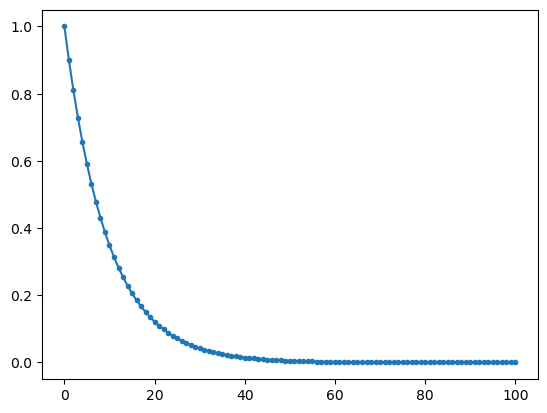

In [4]:
y = euler(first, 1, 0.1, 100, -1)
plt.plot(y, '.-');

A second-order ODE 
$$ \frac{d^2y}{dt^2} = a_2 \frac{dy}{dt} + a_1 y + a_0 $$
can be converted into a first-order ODE of a 2-dimensional vector 
${\bf y} = \pmatrix{y_1 \\ y_2} =\pmatrix{y \\ \frac{dy}{dt}}$ as 
$$ \frac{dy_1}{dt} = y_2 $$
$$ \frac{dy_2}{dt} = a_2 y_2 + a_1 y_1 + a_0 $$
or in a vector-matrix form
$$ \frac{d}{dt}{\bf y} = A{\bf y} + {\bf b}$$
where
$$ A = \pmatrix{0 & 1 \\ a_1 & a_2} \mbox{ and } {\bf b} = \pmatrix{0 \\ a_0}$$

In [5]:
def second(y, t, a):
    """second-order linear ODE """
    y1, y2 = y
    return np.array([y2, a[2]*y2 + a[1]*y1 + a[0]])

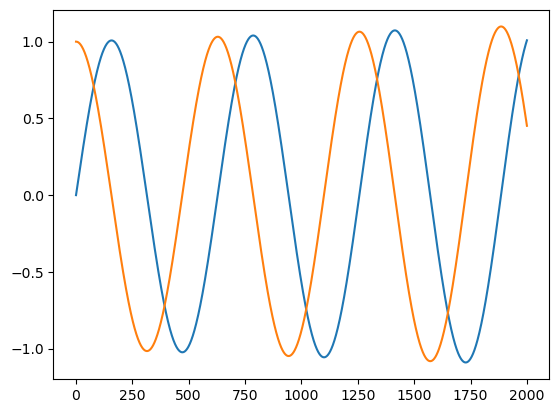

In [6]:
y = euler(second, [0, 1], 0.01, 2000, [0, -1, 0])
plt.plot(y);

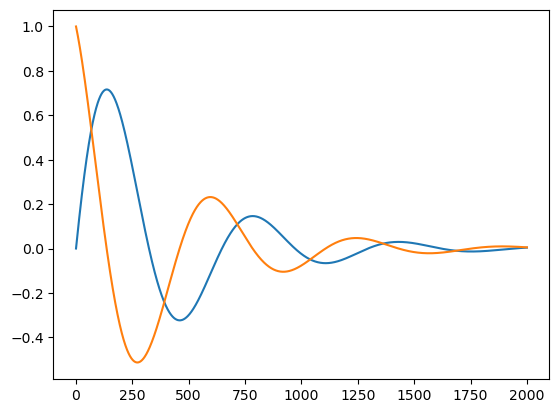

In [7]:
y = euler(second, [0, 1], 0.01, 2000, [0, -1, -0.5])
plt.plot(y);

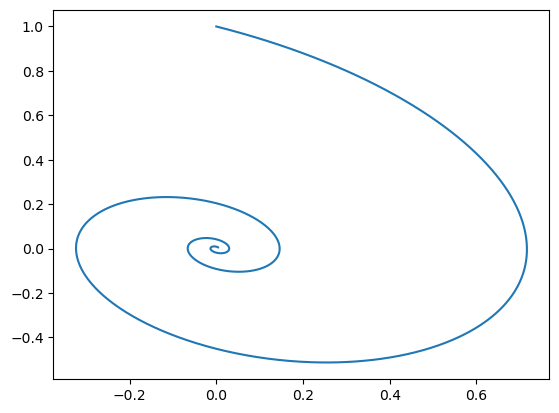

In [8]:
# phase plot
plt.plot(y[:,0], y[:,1]);

Let us see how the time step affects the accuracy of the solution.

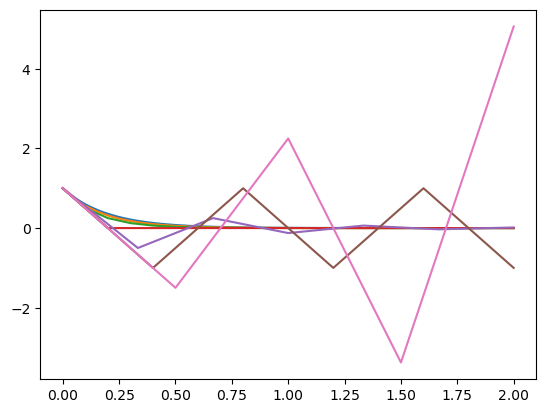

In [9]:
steps = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
tend = 2
a = -5
for dt in steps:
    y = euler(first, 1, dt, int(tend/dt), a)
    plt.plot(np.linspace(0, tend, len(y)), y)

## Scipy's Integrate package
To avoid numerical instability and to improve accuracy and efficiency, there are advanced methods for ODE solutions.
* Backward Euler method: solve
$$ y(t+\Delta t) = y(t) + f(y(t+\Delta t)) \Delta t$$

* Mixture of forward and backward (Crank-Nicolson): 
$$ y(t+\Delta t) = y(t) + \frac{1}{2}\{f(y(t))+f(y(t+\Delta t))\} \Delta t$$

* Runge-Kutta method: minimize higher-order erros by Taylor expansion
$$ y(t+\Delta t) = y(t) + f(y(t))\Delta t + \frac{1}{2} \frac{d}{dt}f(y(t))\Delta t^2 + ...$$

* Adative time step: adjust $\Delta t$ depending on the scale of $\frac{df(y(t))}{dt}$.

The implementation and choice of these methods require a good expertise, but fortunately `scipy` includes `integrate` package which has been well tested and optimized.  
`odeint()` implements automatic method switching and time step adaptation.  
`ode()` is a class interface for multiple methods.

In [10]:
from scipy.integrate import odeint

In [11]:
help(odeint)

Help on function odeint in module scipy.integrate._odepack_py:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
 

Here is an example of first-order linear ODE.

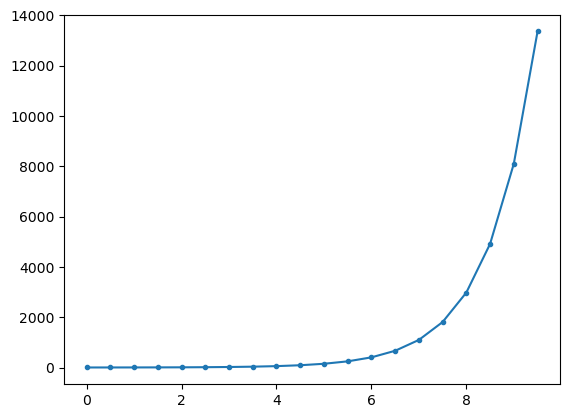

In [12]:
t = np.arange(0, 10, 0.5)  # time points
y = odeint(first, 1, t, args=(1,))
plt.plot(t, y, '.-');

Here's another example of second-order linear ODE.

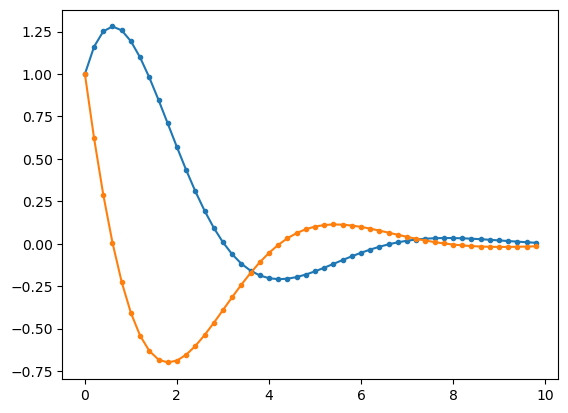

In [13]:
t = np.arange(0, 10, 0.2)  # time points
y = odeint(second, [1, 1], t, args=([0, -1, -1],))
plt.plot(t, y, '.-');

`odeint()` internally uses adaptive time steps, and returns values of `y` for time points specified in `t` by interpolation.

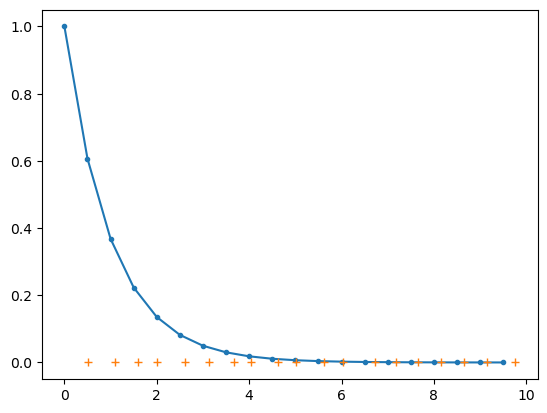

In [14]:
# If you are interested in the internal time steps used...
t = np.arange(0, 10, 0.5)  # time points
y, info = odeint(first, 1, t, args=(-1,), full_output=1)
plt.plot(t, y, '.-')
# the crosses show the time points actually used
plt.plot(info['tcur'], np.zeros_like(info['tcur']), '+');

## Fixed Point and Stability
A point $y$ that satisfy $\frac{d}{dt}{\bf y}=f({\bf y})={\bf 0}$ is called a *fixed point*.

A fixed point is characterized by its *stability*.

In [15]:
def expos(a, b):
    """Exponentials exp(a*t), exp(b*t)"""
    u = np.array(np.exp(a*t))
    v = np.array(np.exp(b*t))
    x = np.array([u, -u, -u, u]).T
    y = np.array([v, v, -v, -v]).T
    return x, y

def spirals(a, b):
    """Spirals: exp(a*t)*cos(b*t), exp(a*t)*sin(b*t) """
    u = np.array(np.exp(a*t)*np.cos(b*t))
    v = np.array(np.exp(a*t)*np.sin(b*t))
    x = np.array([u, v, -u, -v]).T
    y = np.array([v, -u, -v, u]).T
    return x, y

def arrowcurves(x, y, s=0.1):
    """curves with an arrowhead
    x, y: time courses in columns
    s: arrowhead size"""
    plt.plot(x, y)
    n = x.shape[1]  # columns
    for i in range(n):
        plt.arrow(x[-2,i], y[-2,i], x[-1,i]-x[-2,i], y[-1,i]-y[-2,i],
                 head_width=s, head_length=s)
    plt.axis('equal')
    

In [16]:
t = np.linspace(0, 1)  # time points

* Stable
    - Attractor
    - Neutrally stable

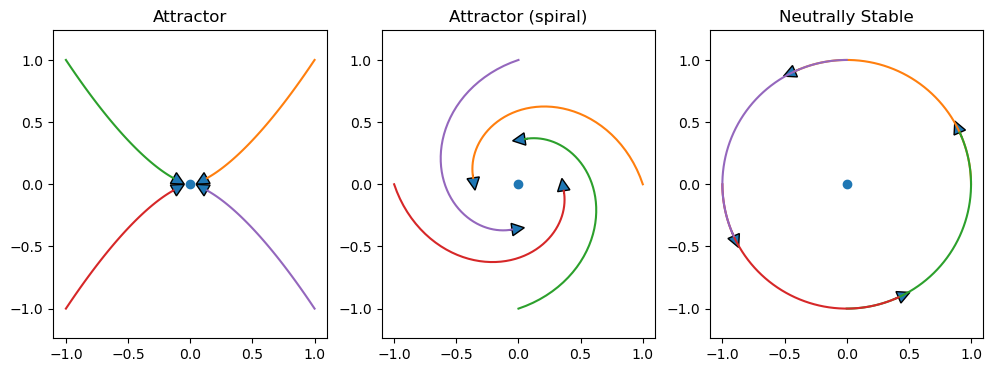

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Attractor')
plt.plot(0, 0, 'o')
x, y = expos(-2, -3)
arrowcurves(x, y)
plt.subplot(1,3,2)
plt.title('Attractor (spiral)')
plt.plot(0, 0, 'o')
x, y = spirals(-1, 3)
arrowcurves(x,y)
plt.subplot(1,3,3)
plt.title('Neutrally Stable')
plt.plot(0, 0, 'o')
x, y = spirals(0, 2)
arrowcurves(x,y)

* Unstable
    - repellor
    - Saddle

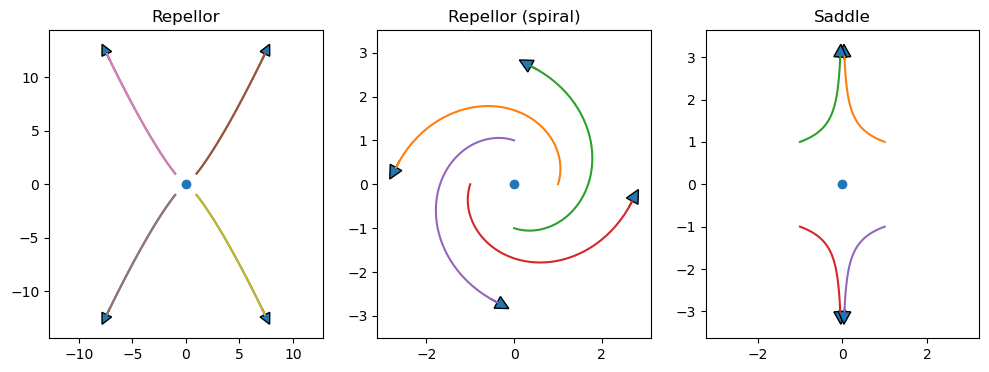

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Repellor')
plt.plot(0, 0, 'o')
x, y = expos(2, 2.5)
arrowcurves(x, y, s=1)
arrowcurves(x, y)
plt.subplot(1,3,2)
plt.title('Repellor (spiral)')
plt.plot(0, 0, 'o')
x, y = spirals(1, 3)
arrowcurves(x, y, s=0.3)
plt.subplot(1,3,3)
plt.title('Saddle')
plt.plot(0, 0, 'o')
x, y = expos(-3, 1.1)
arrowcurves(x, y, s=0.3)

## Linear dynamical system

For a linear dynamical system
$$ \frac{d}{dt}{\bf y} = A {\bf y} $$
where ${\bf y}$ is an $n$ dimensional vector and $A$ is an $n\times n$ matrix, the origin ${\bf y}={\bf 0}$ is always a fixed point. 
Its stability is determined by the eigenvalues of $A$.

* If the real part of all the eigenvalues are negative or zero, the system is stable.

* If any of the real part of the eigenvalues is positive, the system is unstable.

* If there are complex eigenvalues, the solution is oscillatory.

In [19]:
def linear(y, t, A):
    """Linear dynamcal system dy/dt = Ay
    y: n-dimensional state vector
    t: time (not used, for compatibility with odeint())
    A: n*n matrix"""
    # y is an array (row vector), A is a matrix
    return A@y

def lode_plot(A, y0=[1,0]):
    """Plot the trajectory and eiven values of linear ode"""
    ev,_ = np.linalg.eig(A)
    print('A =', A, '\nev =', ev)
    t=np.arange(0, 10, 0.1)
    y = odeint(linear, y0, t, args=(A,))
    plt.plot(y[0,0], y[0,1], 'o')   # starting point
    plt.plot(y[:,0], y[:,1], '.-')  # trajectory
    plt.plot(y[-1,0], y[-1,1], '*')  # end point
    plt.axis('equal')

Try different settings of A.

A = [[-1, 1], [-1, 0]] 
ev = [-0.5+0.8660254j -0.5-0.8660254j]


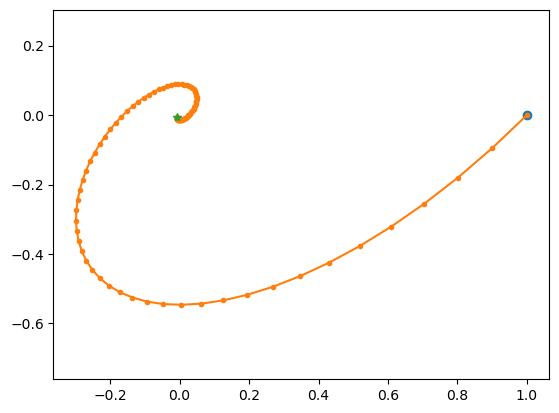

In [20]:
# spiral in
lode_plot([[-1, 1], [-1, 0]])

A = [[1, 1], [-1, 0]] 
ev = [0.5+0.8660254j 0.5-0.8660254j]


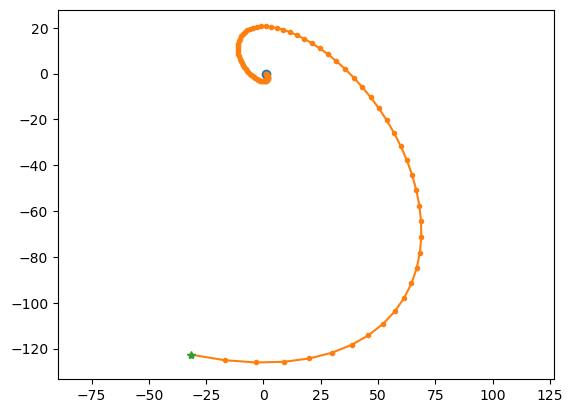

In [21]:
# spiral out
lode_plot([[1, 1], [-1, 0]])

A = [[-1, 0], [0, 1]] 
ev = [-1.  1.]


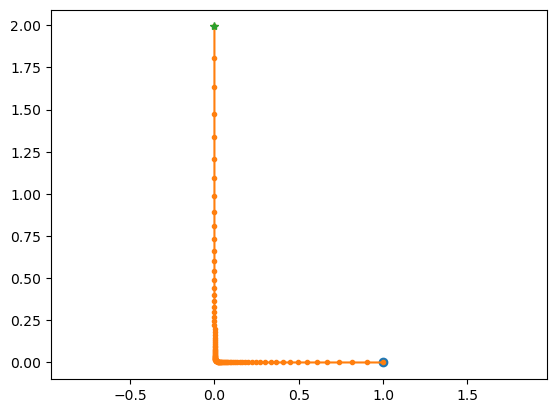

In [22]:
# saddle point
lode_plot([[-1, 0], [0, 1]], [1,0.0001])

## Nonlinear ODEs
While the dynamics of a linear ODE can show only convergence, divergence, or neutrally stable oscillations, nonlinear ODEs can show limit-cycle oscillation and chaos.

### Van der Pol oscillator
This is a classic equation describing an oscillator circuit with a vacuume tube:
$$ \frac{d^2y}{dt^2} - \mu(1-y^2)\frac{dy}{dt} + y = 0 $$

In [23]:
def vdp(y, t, mu):
    """Van der Pol equation"""
    y1, y2 = y
    return np.array([y2, mu*(1 - y1**2)*y2 - y1])

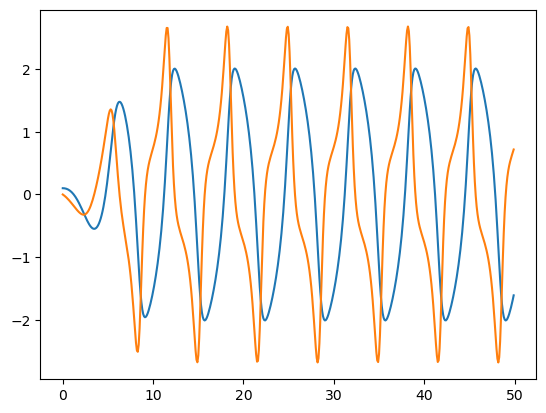

In [24]:
t = np.arange(0, 50, 0.1)
y = odeint(vdp, [0.1, 0], t, args=(1,))
plt.plot(t, y);

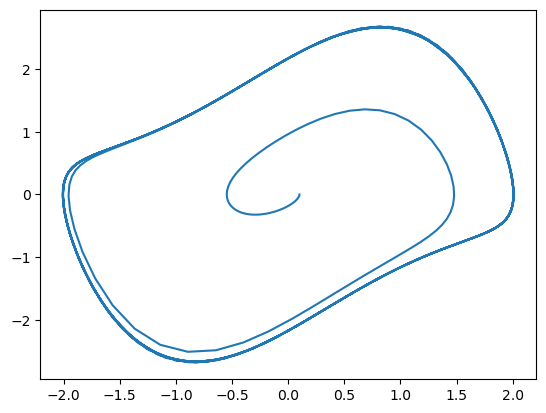

In [25]:
# phase plot
plt.plot(y[:,0], y[:,1]);

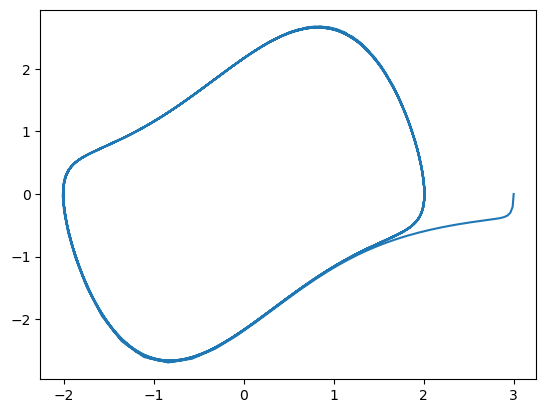

In [26]:
# from outside
y = odeint(vdp, [3, 0], t, args=(1,))
plt.plot(y[:,0], y[:,1]);

### Periodic orbit and Limit cycle
If a trajectry comes back to itself $y(t+T) = y(t)$ after some period $T$, it is called a *periodic orbit*.  
If trajectories around it converges to a periodic orbit, it is called a *limit cycle*.

*Poincaré-Bendixon theorem*: In a continuous 2D dynamical system, if a solution stay within a closed set with no fixed point, it converges to a periodic orbit.  
It implies that there is no chaos in a continuous 2D dynamic system.

### Lorenz attractor
Edward Lorenz derived a simplified equation describing the convection of atmosphere and found that it shows non-periodic oscillation.
$$ \frac{dx}{dt} = p(y - x) $$
$$ \frac{dy}{dt} = -xz + rx - y $$
$$ \frac{dz}{dt} = xy - bz $$

In [27]:
def lorenz(xyz, t, p=10., r=28., b=8./3):
    """Lorenz equation"""
    x, y, z = xyz
    dxdt = p*(y - x)
    dydt = -x*z + r*x - y
    dzdt = x*y - b*z
    return np.array([dxdt, dydt, dzdt])

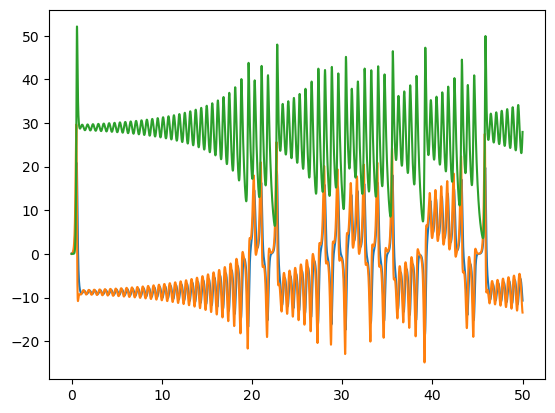

In [28]:
y0 = np.array([0.1, 0, 0])
t = np.arange(0, 50, 0.01)
y = odeint(lorenz, y0, t, args=(10., 30., 8./3))
plt.plot(t, y);

In [29]:
%matplotlib notebook

In [30]:
# Plot in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot(y[:,0], y[:,1], y[:,2], lw=0.5);

<IPython.core.display.Javascript object>